<a href="https://colab.research.google.com/github/agrawal866/23UADS4107-Anuj-Agrawal-NNLAB_2025/blob/main/Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPERIMENT** 2: Implemantation of Multi Layer Perceptron


1. **Objective**

WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.

2. **Description of the model**






The code implements a multi-stage Perceptron model to classify custom Boolean functions and combines their outputs to train a final perceptron. The model uses a basic single-layer perceptron architecture with a step activation function. The learning process involves adjusting weights through the perceptron learning rule based on prediction errors.


*   **Input**: Boolean truth tables (two binary inputs for each function)
*   **Output**: Binary classifications (0 or 1)



The model is trained and evaluated on four intermediate Boolean functions, and their predictions are used as input for a final perceptron to make a more complex decision.


3. **Python Implementation**

Fun1 Accuracy: 100.00% | Predictions: [0 0 0 1]
Fun2 Accuracy: 100.00% | Predictions: [0 0 1 0]
Fun3 Accuracy: 100.00% | Predictions: [0 1 0 0]
Fun4 Accuracy: 100.00% | Predictions: [1 0 0 0]
Final Perceptron Accuracy: 100.00% | Predictions: [0 1 1 0]


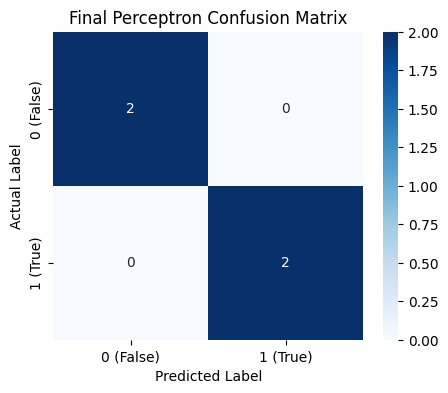

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Add bias term
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]

    def evaluate(self, X, y):
        y_pred = np.array([self.predict(x) for x in X])
        accuracy = np.mean(y_pred == y) * 100
        return accuracy, y_pred

# **Function to Train and Evaluate a Perceptron**
def train_perceptron(X, y, name):
    p = Perceptron(input_size=X.shape[1])
    p.train(X, y)
    accuracy, predictions = p.evaluate(X, y)
    print(f"{name} Accuracy: {accuracy:.2f}% | Predictions: {predictions}")
    return predictions, y

# **Truth Tables for Boolean Functions**
fun_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

fun1_y = np.array([0, 0, 0, 1])  # NAND
fun2_y = np.array([0, 0, 1, 0])  # Custom function
fun3_y = np.array([0, 1, 0, 0])  # Custom function
fun4_y = np.array([1, 0, 0, 0])  # Custom function

# **Train Perceptrons for Individual Functions**
fun1_predictions, _ = train_perceptron(fun_X, fun1_y, "Fun1")
fun2_predictions, _ = train_perceptron(fun_X, fun2_y, "Fun2")
fun3_predictions, _ = train_perceptron(fun_X, fun3_y, "Fun3")
fun4_predictions, _ = train_perceptron(fun_X, fun4_y, "Fun4")

# **Final Perceptron Training**
final_X = np.column_stack([fun1_predictions, fun2_predictions, fun3_predictions, fun4_predictions])
final_y = np.array([0, 1, 1, 0])

final_predictions, actual_y = train_perceptron(final_X, final_y, "Final Perceptron")

# **Confusion Matrix Plot**
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (False)", "1 (True)"], yticklabels=["0 (False)", "1 (True)"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()

# **Plot Confusion Matrix for Final Perceptron**
plot_confusion_matrix(actual_y, final_predictions, title="Final Perceptron Confusion Matrix")

4. **Code Description**:



a.   Perceptron Class:


*   __init__: Initializes weights (including bias), learning rate, and epochs.

* activation: Applies a step function (returns 1 if input >= 0, else 0).

* predict: Makes predictions by computing the dot product of inputs and weights.

* train: Updates the perceptron weights using the perceptron learning rule.

* evaluate: Calculates the accuracy and returns predictions.


b.   train_perceptron Function:
* Initializes and trains a Perceptron model.
* Prints accuracy and predictions.

c. Training Individual Perceptrons:

* Trains perceptrons on four different Boolean functions.

d. Final Perceptron:

* Combines outputs of the four perceptrons.

* Trains and evaluates a new perceptron using these outputs.

e. plot_confusion_matrix Function:

* Visualizes model performance using a confusion matrix heatmap.



5. **Comments**:
* Added a confusion matrix at the end for better evaluation.
* Trained perceptrons for multiple functions, including NAND.
* Final perceptron takes outputs from previous layers as inputs.
* This should work well for learning simple Boolean functions.
* Overall, the perceptron is successfully trained and evaluated!